In [1]:
import scanpy as sc
import scarches as sca
import numpy as np
from scarches.plotting.terms_scores import plot_abs_bfs_key

In [18]:
sc.set_figure_params(figsize=(6, 6))
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

### Pbmc Kang

In [3]:
adata = sc.read('kang_pbmc_integrated.h5ad')

In [4]:
adata.obs['condition_merged'] = adata.obs['condition'].tolist()
adata.obs['condition_merged'][adata.obs['condition_merged'].astype(str)=='nan'] = 'control'
adata.strings_to_categoricals()

<ipython-input-4-dcc145970c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['condition_merged'][adata.obs['condition_merged'].astype(str)=='nan'] = 'control'
... storing 'condition_merged' as categorical


In [5]:
intr_cvae = sca.models.TRVAE.load('q_intr_cvae_nolog_alpha_kl_0_5_0_1_sd_2020', adata)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1972 256 5
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 282
Decoder Architecture:
	Masked linear layer in, out and cond:  282 1972 5


In [6]:
directions = intr_cvae._latent_directions(method="sum")

In [7]:
adata.obsm['X_cvae'] *= directions[intr_cvae.model.decoder.nonzero_terms()]

In [8]:
scores_cond = intr_cvae.latent_enrich('condition_merged', comparison="control", directions=directions, adata=adata, n_perm=7000)

In [9]:
scores_ct = intr_cvae.latent_enrich('cell_type_joint', directions=directions, n_perm=7000, adata=adata)

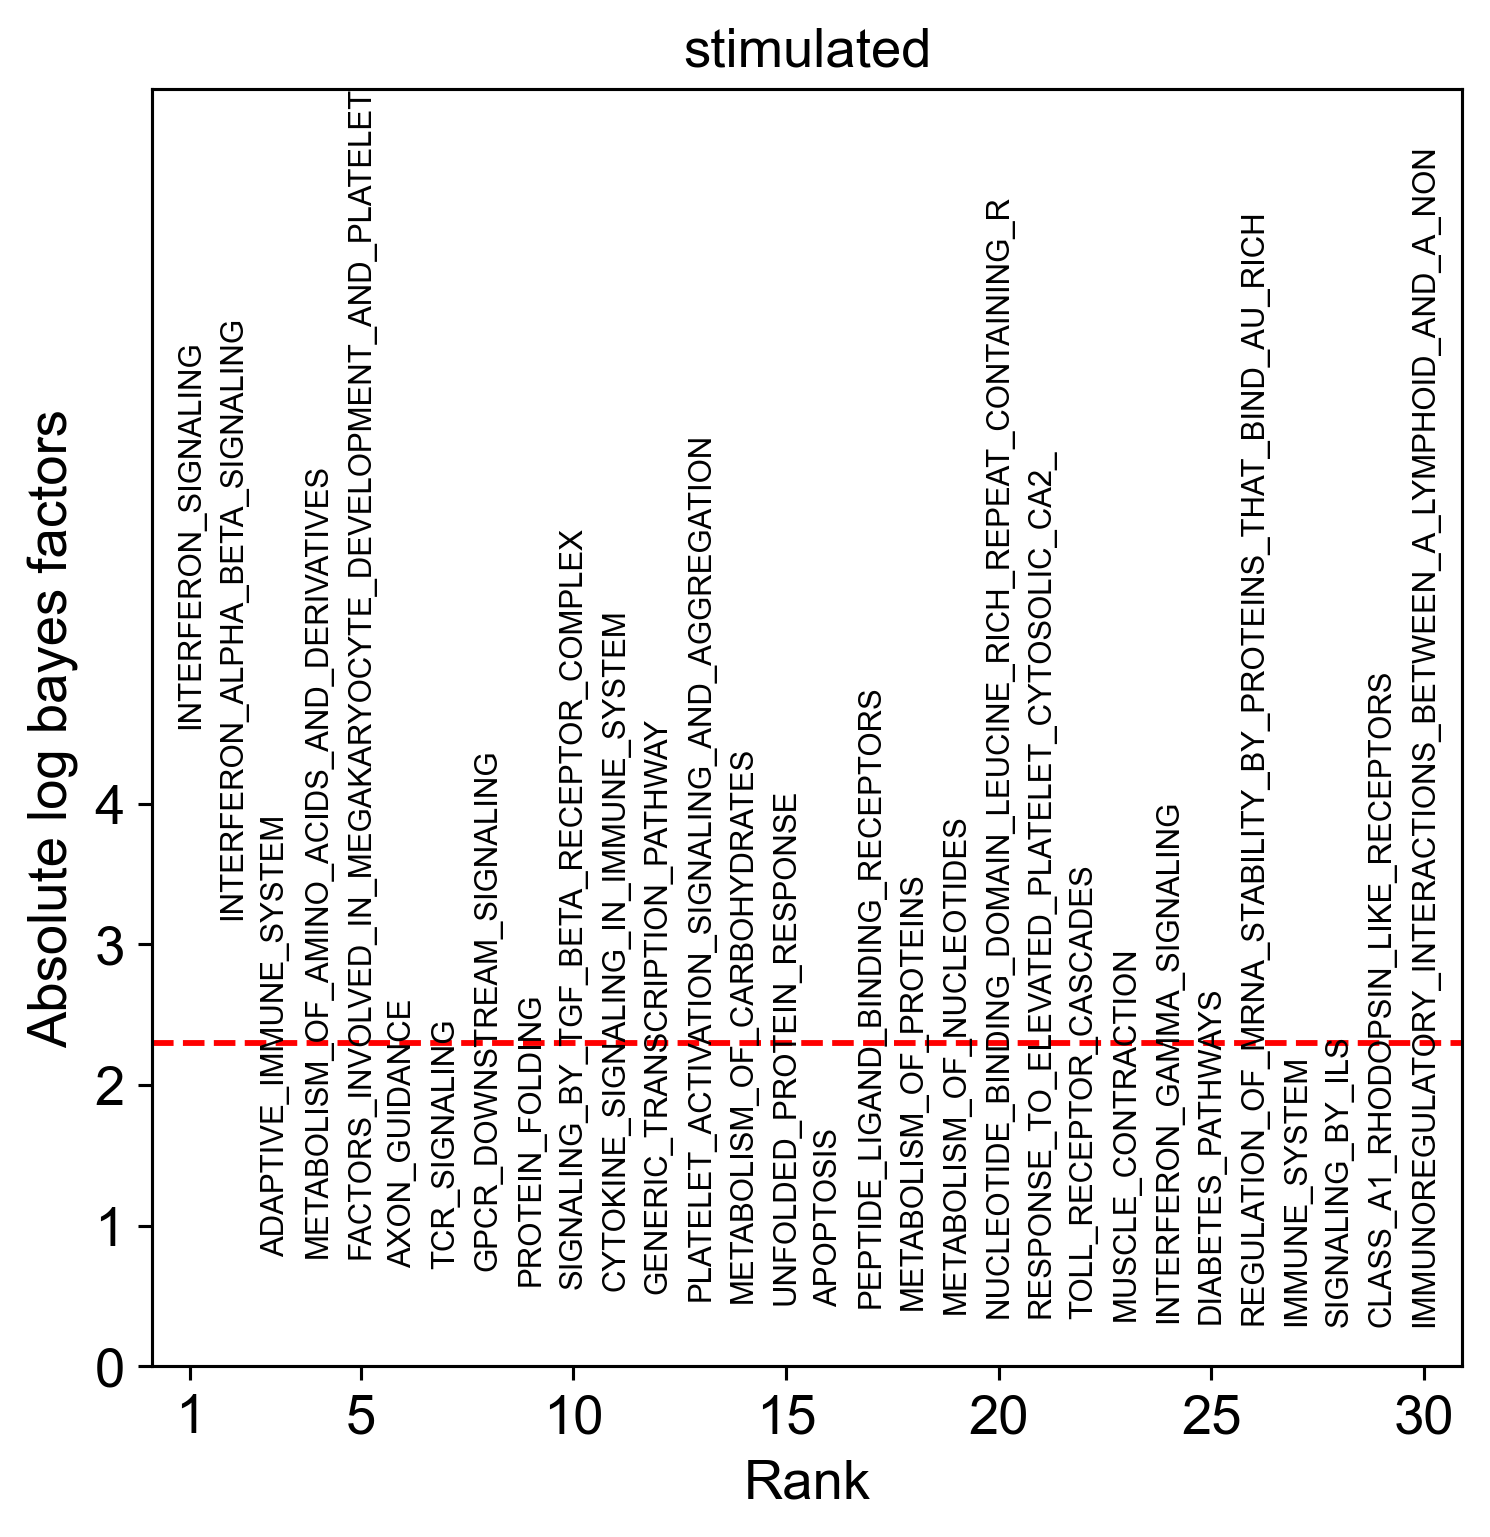

In [27]:
# plot one key
fig = sca.plotting.plot_abs_bfs(scores_cond, np.array([term[:58] for term in adata.uns['full_terms']]), keys='stimulated', yt_step=1, fontsize=8, scale_y=2)

In [28]:
fig.savefig('pbmc_kang_overall_ranks.png', bbox_inches = "tight")

In [24]:
help(sca.plotting.plot_abs_bfs)

Help on function plot_abs_bfs in module scarches.plotting.terms_scores:

plot_abs_bfs(scores, terms, keys=None, n_cols=3, **kwargs)



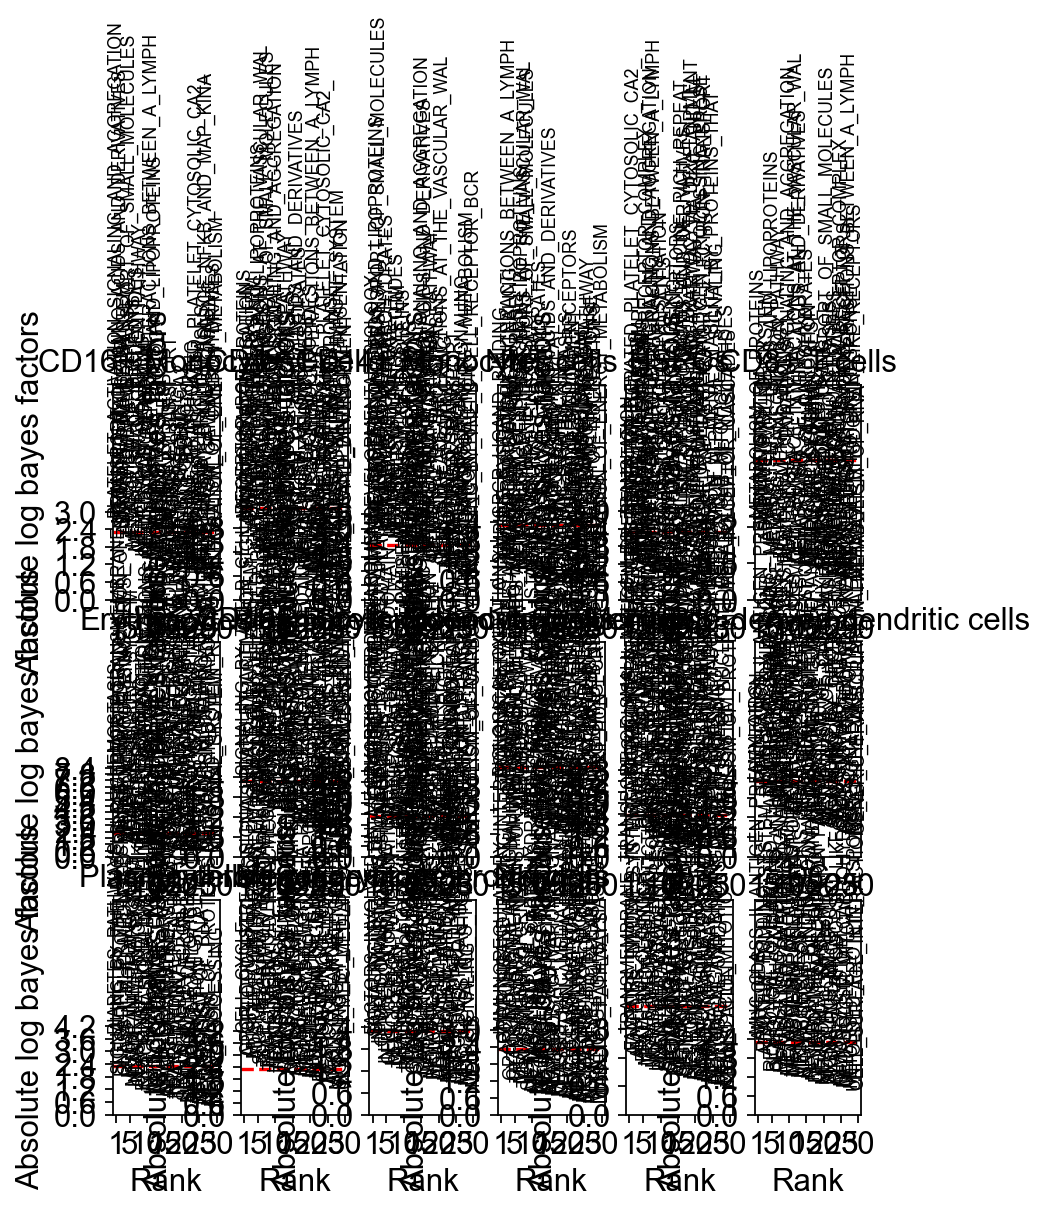

In [42]:
# plot all keys
fig = sca.plotting.plot_abs_bfs(scores_ct, np.array([term[:45] for term in adata.uns['full_terms']]), n_cols=6, scale_y=2.6, yt_step=0.6)

In [43]:
fig.set_size_inches(40, 24)

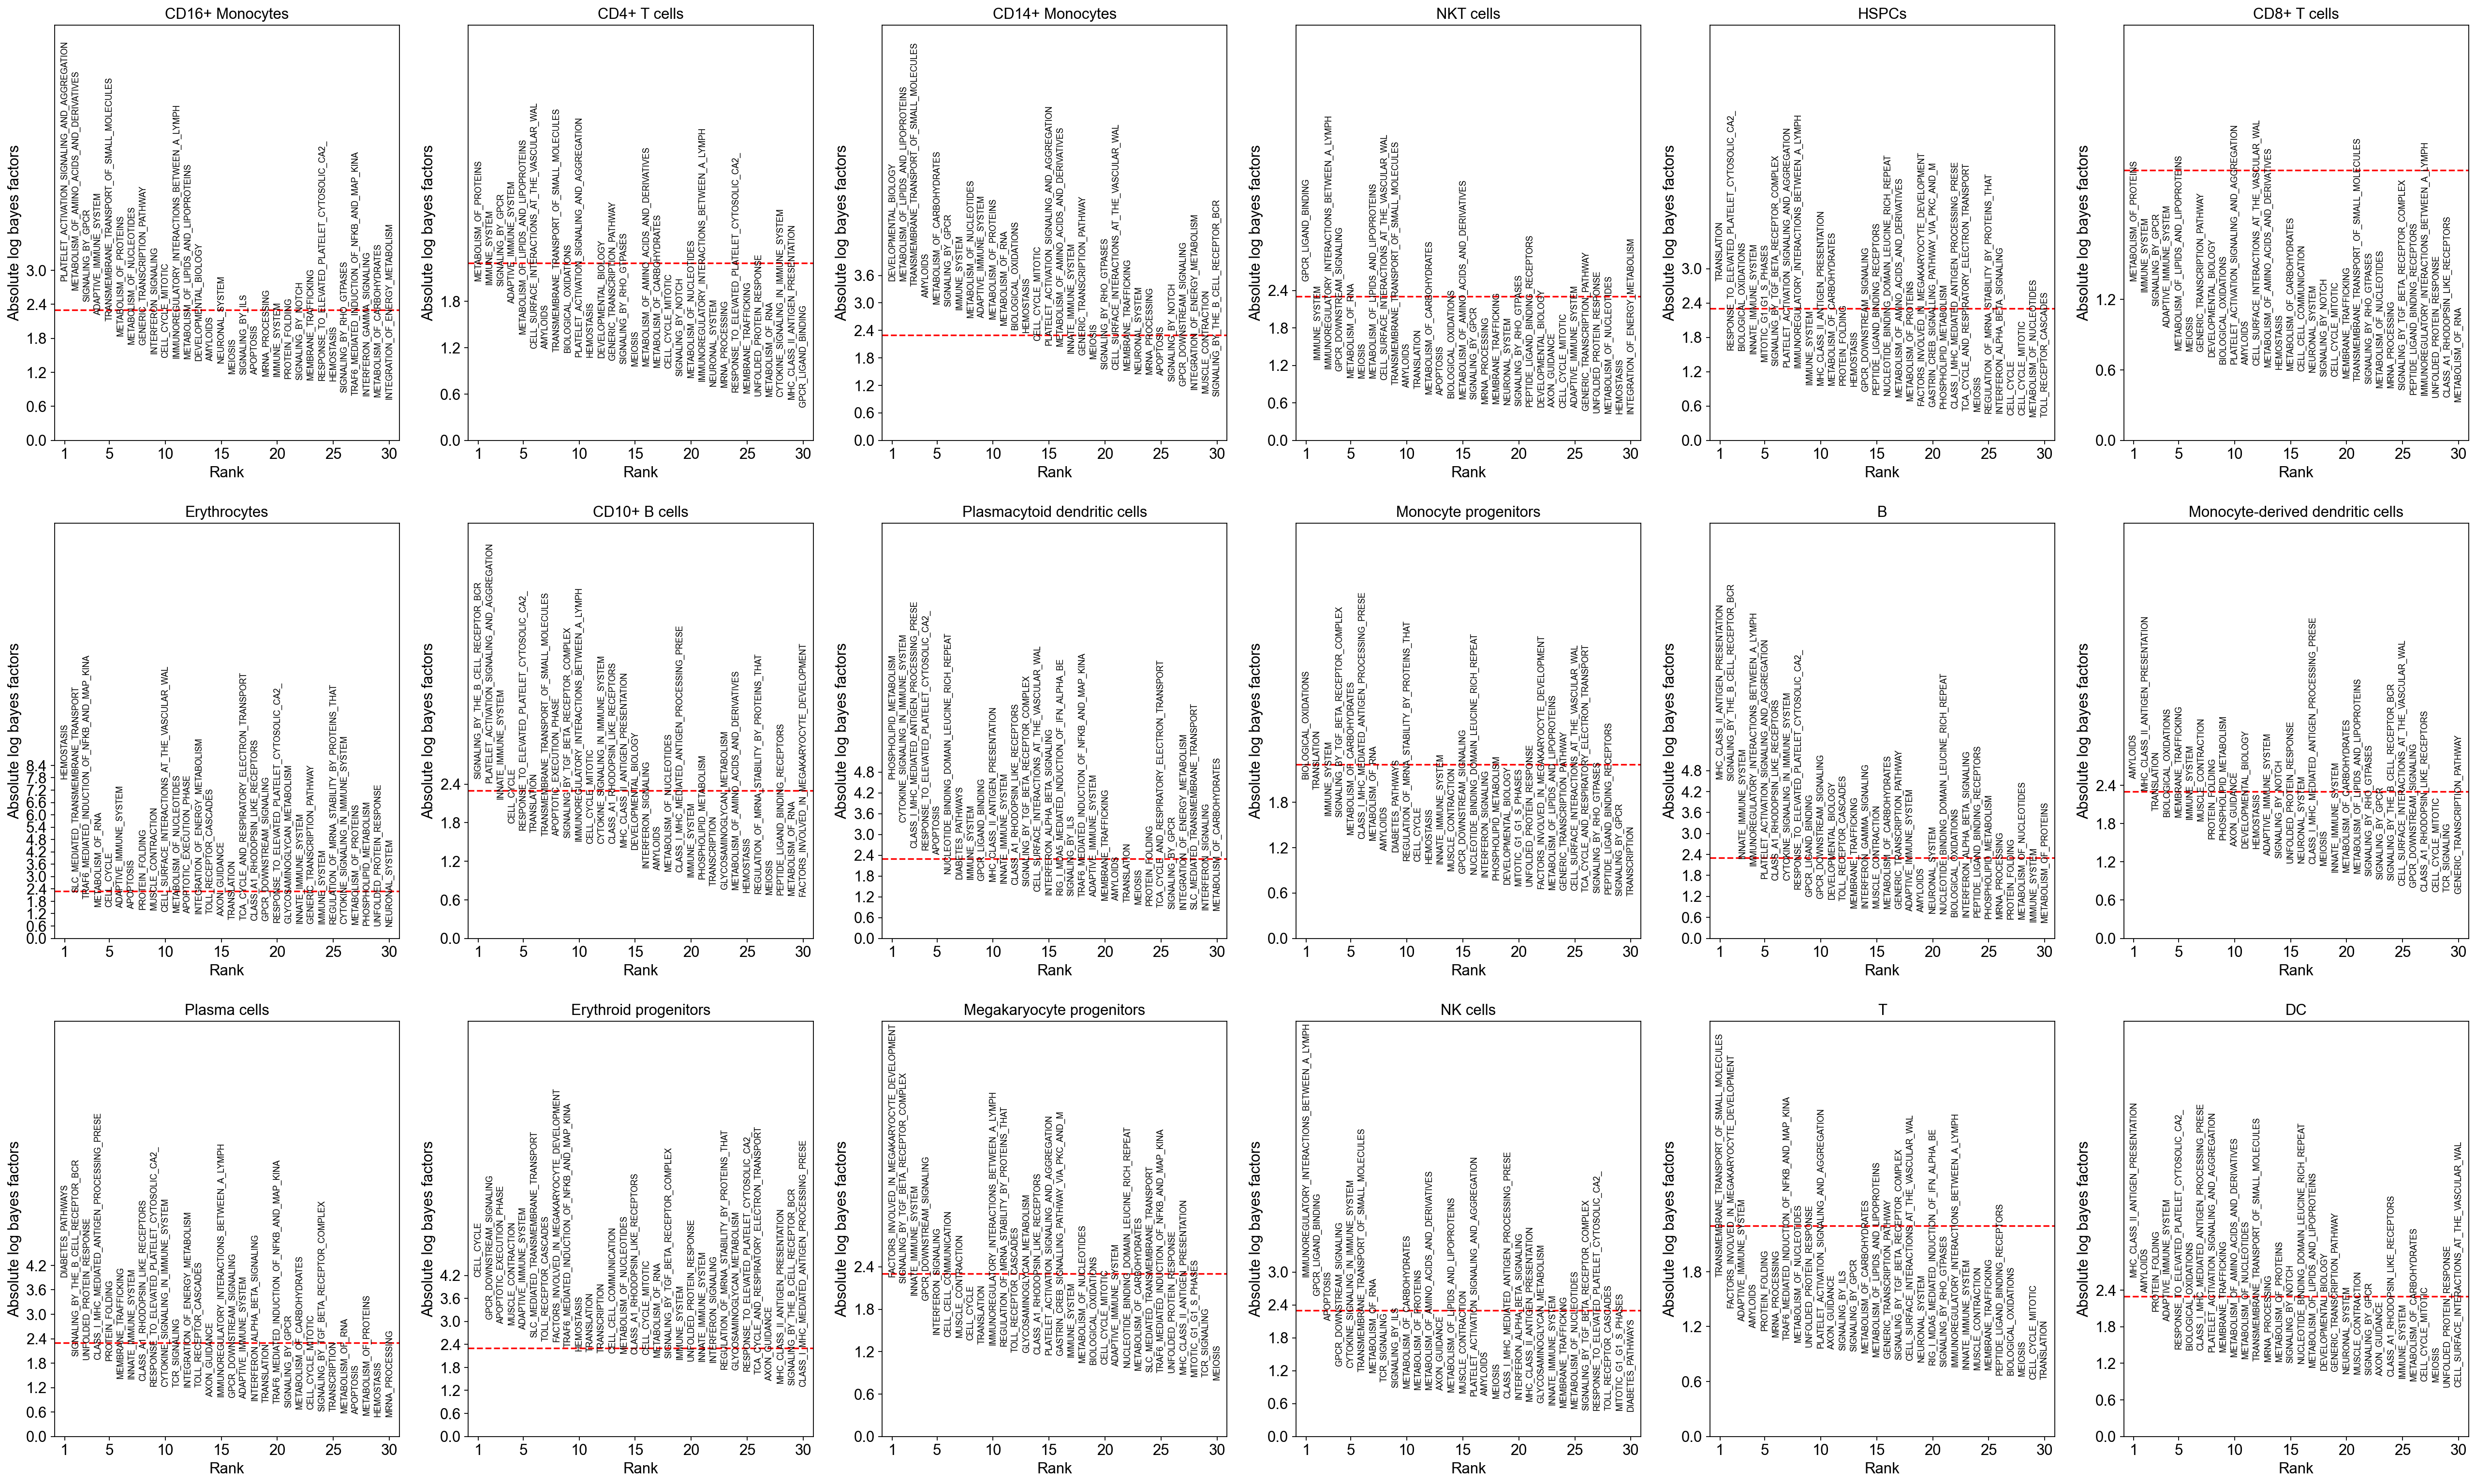

In [44]:
fig

In [45]:
fig.savefig('pbmc_kang_overall_ranks_all.png', bbox_inches = "tight")

In [15]:
# get genes' names for terms
intr_cvae.terms_genes()['APOPTOTIC_CLEAVAGE_OF_CELLULAR']

['LMNA',
 'CASP8',
 'SATB1',
 'CTNNB1',
 'PRKCD',
 'ADD1',
 'CASP3',
 'APC',
 'LMNB1',
 'PLEC',
 'TJP2',
 'GSN',
 'SPTAN1',
 'BIRC2',
 'VIM',
 'CASP7',
 'STK24',
 'ROCK1']

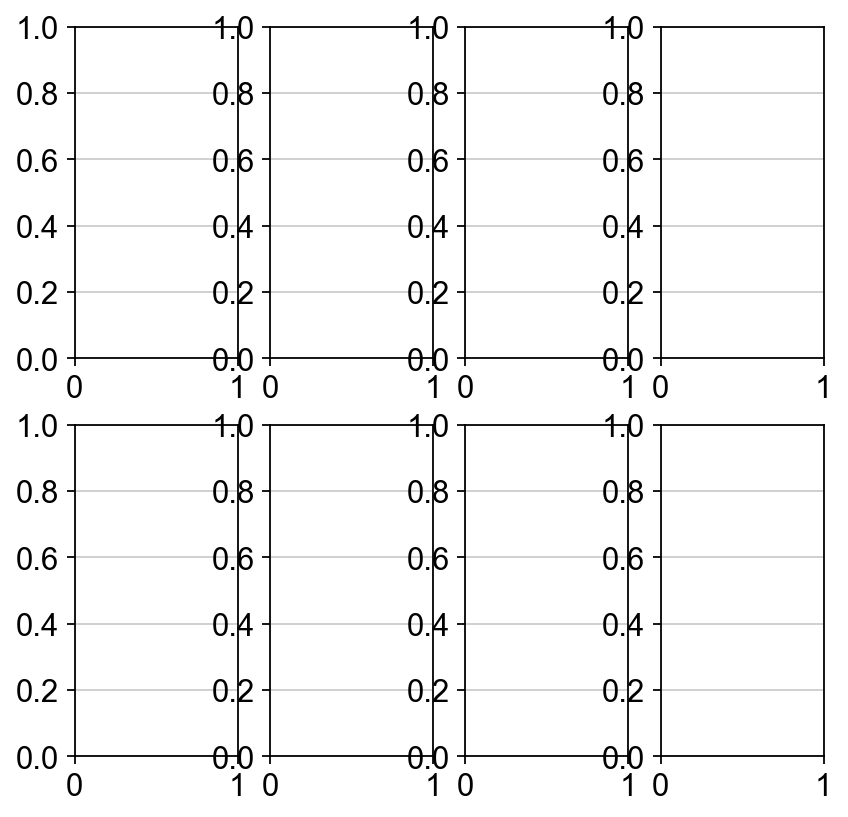

In [70]:
fig, axs = plt.subplots(2, 4)

In [71]:
terms = np.array([term[:50] for term in adata.uns['full_terms']])
for i, cat in enumerate(adata.obs.cell_type_joint[adata.obs.batch_join == 'Kang (query)'].unique()):
    adata_ct = adata[adata.obs.cell_type_joint == cat]
    scores_c_ct = intr_cvae.latent_enrich('condition_merged', comparison="control", directions=directions, adata=adata_ct, n_perm=10000)
    plot_abs_bfs_key(scores_c_ct, terms, 'stimulated', title=cat, ax=axs[i//4, i%4], yt_step=1, scale_y=2.45)

In [72]:
fig.set_size_inches(20, 12)

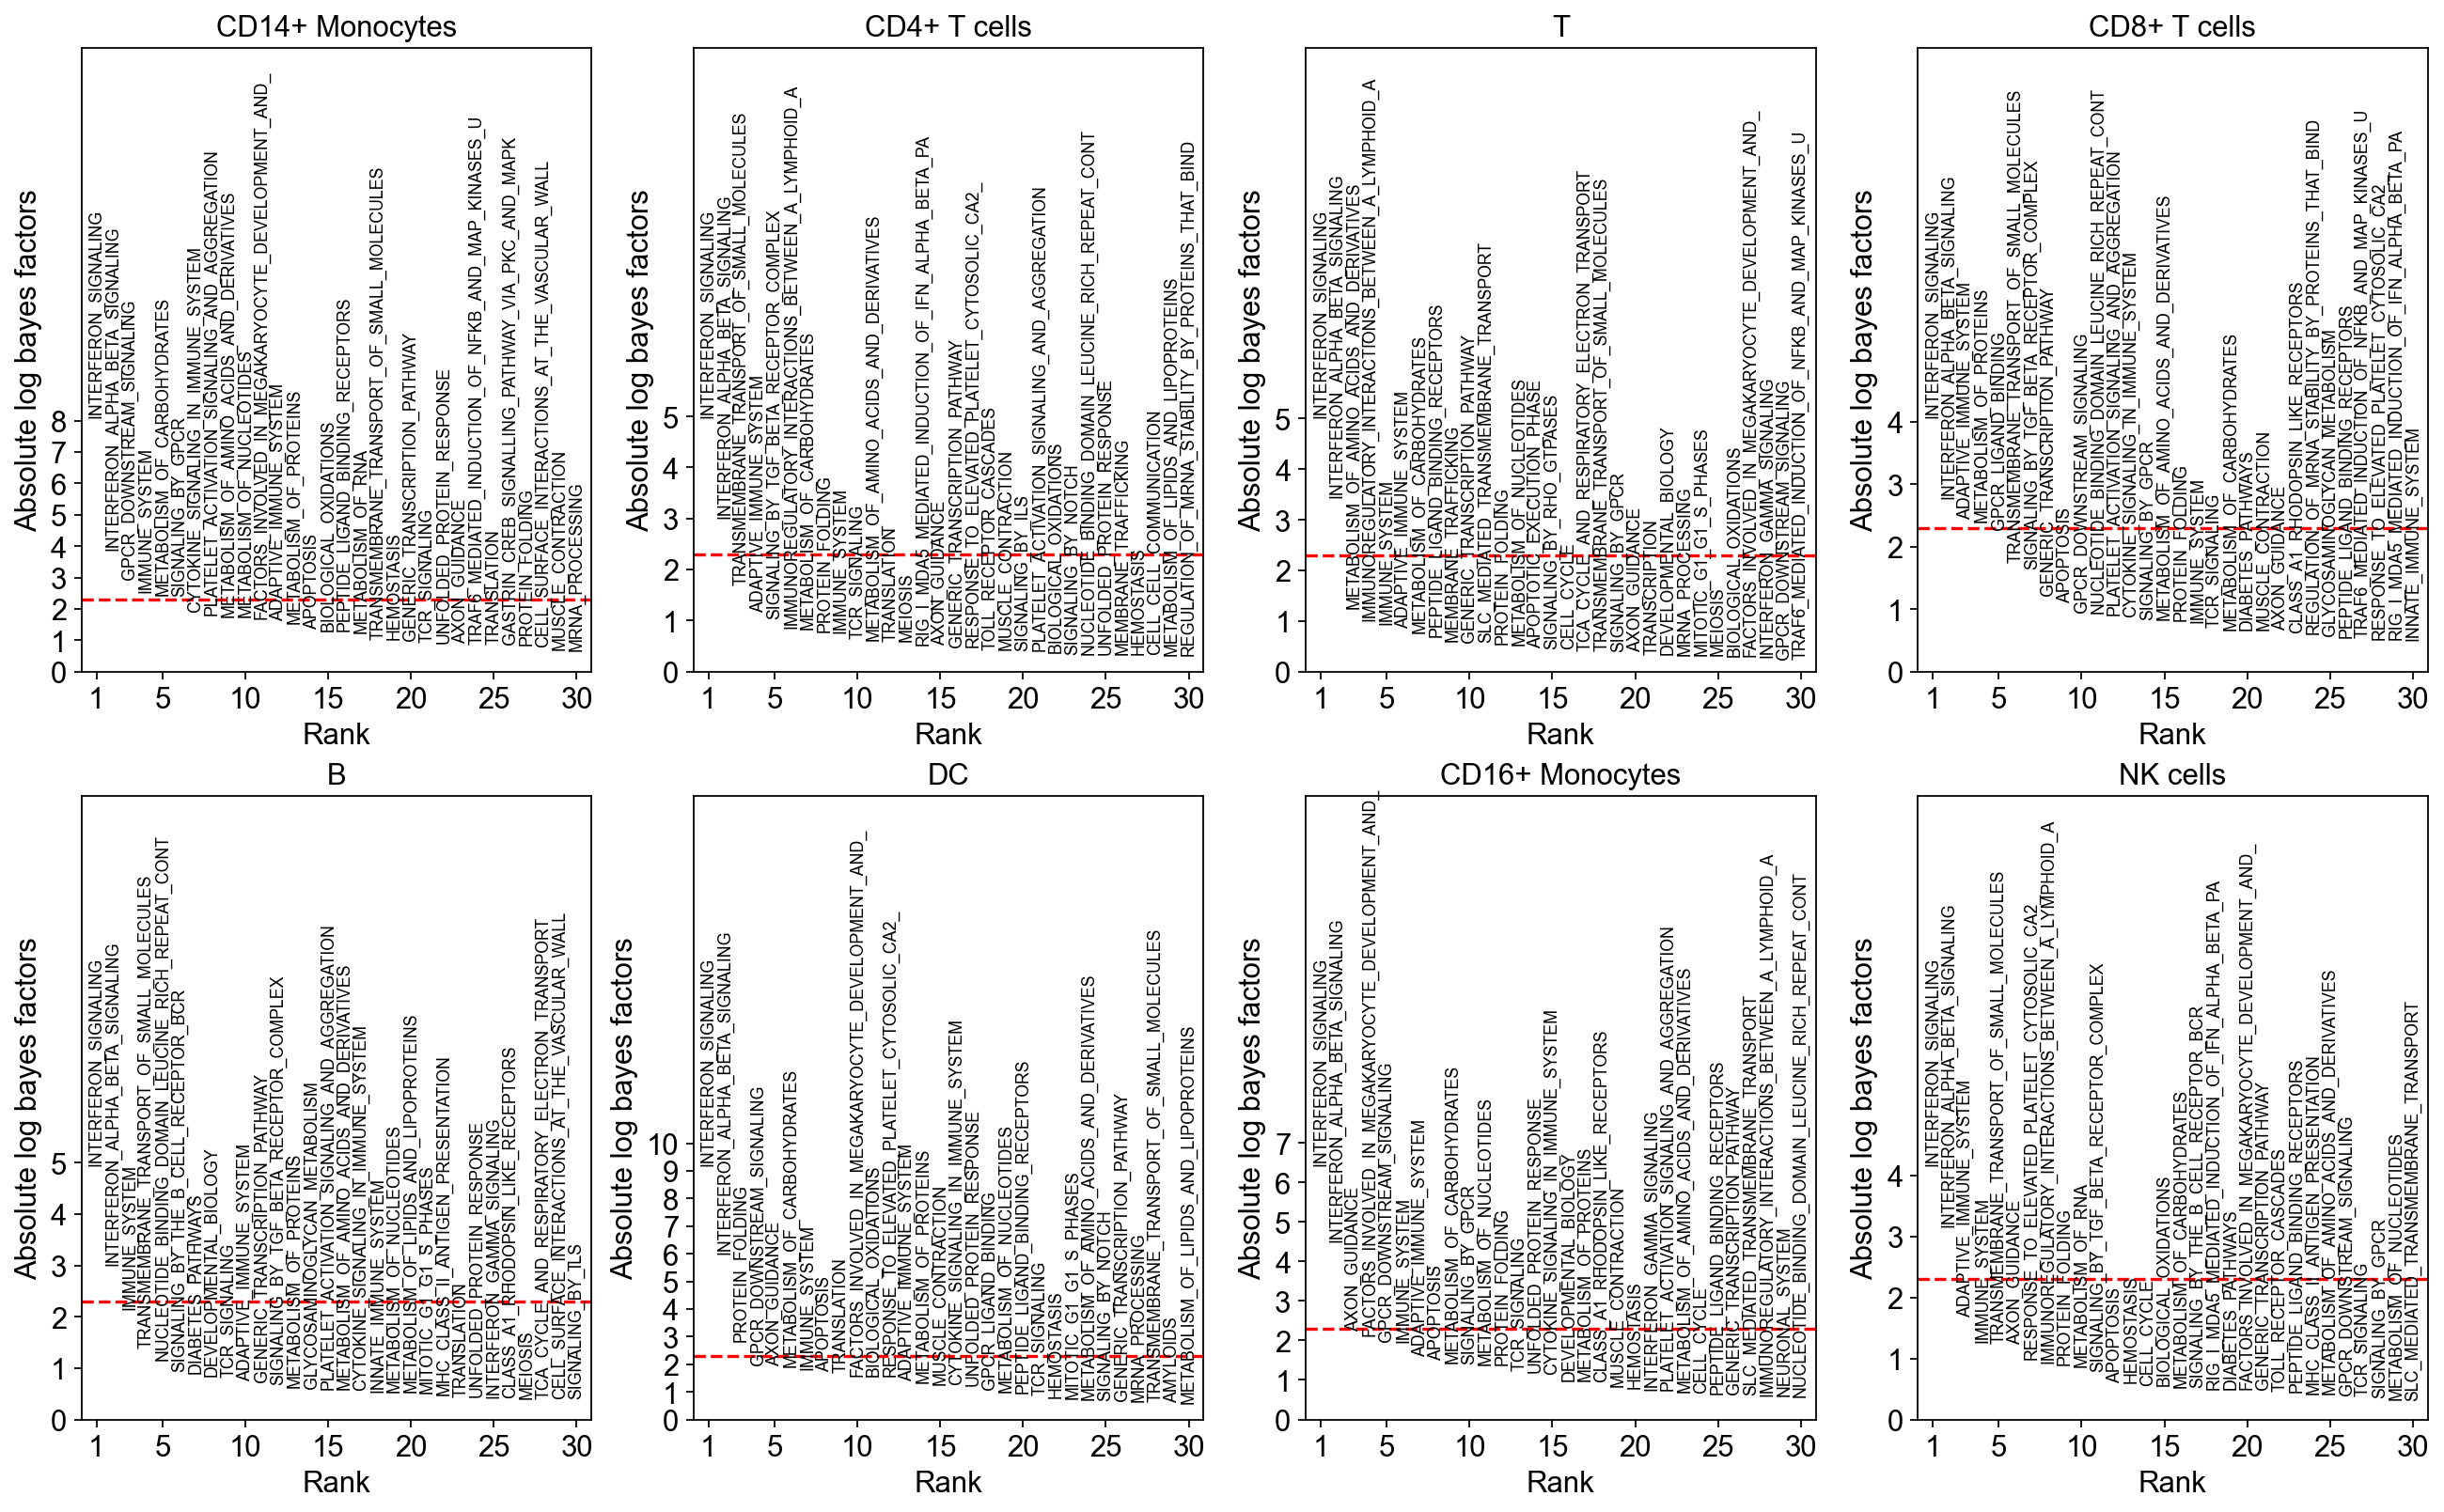

In [73]:
fig